# Data Science Project: Predicting Usage of a Video Game Research Server

**_______________________________________________________________________________________________________________________________**

## Predicting Whether a Player's Age Determines Their Subscription to Game-Related Newsletters

### Introduction

At UBC, a research group led by Frank Wood collected data on people playing video games, specifically Minecraft. Minecraft is a popular game played by millions of people worldwide. Many players often become hooked on the game and stay hooked through newsletters. Newsletters are emails that are sent to players to share news about updates and special offers, encouraging them to make purchases and continue playing. However, subscribing to these newsletters is optional. 

The question we want to answer is: **Can a player's age predict whether they will subscribe to Minecraft emails and newsletters in the `players.csv` dataset?**

The dataset includes the following variables:

- The player's level of experience (`experience`)
- Whether the player subscribed to receive game-related newsletters (`subscribe`)
- The player's email (`hashedEmail`)
- The number of hours the player spent on Minecraft (`played_hours`)
- The player's name (`name`)
- The player's gender (`gender`)
- The player's age (`Age`)

Note that some variables contain missing data for certain players (e.g., N/A). These missing values must be addressed and removed when cleaning the data. 

### Methods & Results

#### Load the Libraries 

We begin by loading the libraries necessary to address our main question. 

In [3]:
#Run cell to load libraries 
library(tidyverse)
library(repr)
library(tidymodels)

#Displays 6 rows from the dataset
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

#### Load the players dataset

Since the file has been downloaded into our data folder, we can load the `players.csv` dataset using the `read_csv` function. 

In [4]:
#Load the players dataset
players_data <- read_csv("Data/players.csv")
players_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


_Table 1: Loaded players dataset._

#### Clean the Dataset

We can clean the dataset by selecting the columns needed for our analysis, which are `subscribe` and `Age`. 
Next, we can concert the `subscribe` column into a categorical factor, which is necessary for classification. 
Additionally, we'll remove all rows containing missing values (e.g., NA).  

In [5]:
#Select the columns needed
#Convert subscribe column to factor 
#Drop all the NAs
players_data_clean <- players_data |>
    select(subscribe, Age) |>
    mutate(subscribe = as_factor(subscribe)) |>
    drop_na()
players_data_clean

subscribe,Age
<fct>,<dbl>
TRUE,9
TRUE,17
FALSE,17
⋮,⋮
FALSE,22
FALSE,17
FALSE,17


_Table 2: Cleaned dataset with the selected columns._

#### Summarize the Table

To determine the relationship between age and newsletter subscription, we grouped the data by the `subscribe` variable, to indicate which players subscribed to the newsletters (`TRUE`) and which didn't (`FALSE`). For each group, we calculated the average (`mean`) and `median` age of the players to see if there are noticeable age differences between the two groups. 

In [6]:
#Group the subscribe column and calculate the mean and median age for each group 
players_data_summary <- players_data_clean |>
    group_by(subscribe) |>
    summarize(mean_age = mean(Age), med_age = median(Age))
players_data_summary

subscribe,mean_age,med_age
<fct>,<dbl>,<dbl>
FALSE,22.98077,21
TRUE,19.61972,18


_Table 3: Summary of players age, grouped by subscription._

From the table, we see that players who do not subscribe to newsletters have an average age of 22.98 years and a median age of 21. In contrast, those who subscribe tend to be a bit younger, with an average age of 19.61 years and a median age of 18.

Although the age difference is about three years, there may be a potential relationship that younger players are more likely to subscribe than older players. 

#### Cleaned Dataset Visualization 

To better understand the relationship between player age and newsletter subscription, we can create a bar plot showing the number of players in each age group who subscribe and those who did not. This visualization will help us see patterns that may be difficult to pull out from a data table. 

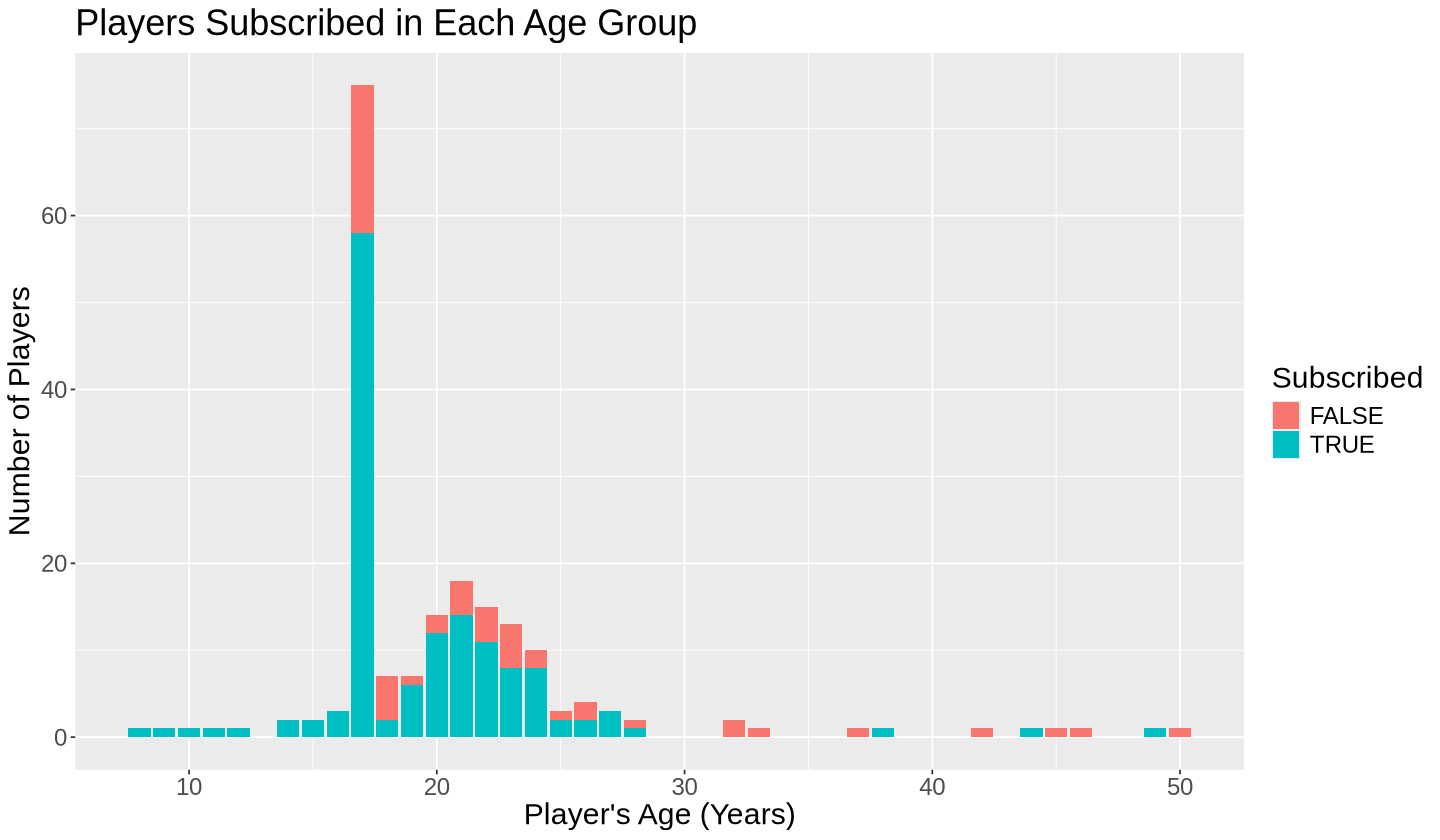

In [7]:
#Set plot width to 12 and height to 7 for more clarity. 
options(repr.plot.width = 12, repr.plot.height = 7)

#Bar plot showing the number of players by age group and their newsletter subscriptions.
player_data_clean_plot <- players_data_clean |>
    ggplot(aes(x = Age, fill = subscribe)) +
    geom_bar(stat = "count") +
    labs(x = "Player's Age (Years)", y = "Number of Players", fill = "Subscribed") +
    ggtitle("Players Subscribed in Each Age Group") +
    theme(text = element_text(size = 18))
player_data_clean_plot

_Figure 1: Bar plot of the number of players in various age groups that subscribed (`TRUE`) and did not subscribe (`FALSE`) to newsletters._

From the graph above, we can see that 17-year-olds represent the largest group of Minecraft players, and this age group has the highest number of both subscribed and non-subscribed players to newsletters. Looking at the age groups around 17, there is no clear pattern regarding who plays Minecraft more or who subscribes more to the newsletters after 17-year-olds. 

We can not proceed to develop a classification model to determine whether a player's age can predict whether they will subscribe to Minecraft emails and newsletters. 

#### Splitting the Dataset into Training and Testing Sets

To ensure we get reproducible results, we first set a seed. 

Next we can split the dataset into a training and testing set. The training set will be used to build our model, and then its accuracy will be evaluated using the testing set. We will use `prop = 0.75` so that 75% of the data set is used for training, and 25% for testing. 

We will use `strata = subscribe` to ensure that both training and testing sets contain similar proportions of each subscription type, so that that model tests fairly.

In [8]:
#Set seed to get reproducible results
set.seed(1000)

#Split the data so 75% is used for the training set and 25% for the testing set
players_split <- initial_split(players_data_clean, prop = 0.75, strata = subscribe) 
players_train <- training(players_split) 
players_test <- testing(players_split)

#### Creating the Model's Recipe

For our classification model recipe, we will use `subscribe` as the response variable and `Age` as the predictor variable. 

To increase the model's performance, we will scale and center the predictor so that it has a mean of 0 and standard deviation of 1, which helps improve the model's accuracy. 

In [9]:
#Scale and center the predictors
players_recipe <- recipe(subscribe ~ Age, data = players_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())
players_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 1



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



#### Setting up the k-NN Model

We will use the k-Nearest Neighbors (k-NN) method for our classification model. Since this method assigns a class based on the closest data points, it is appropriate for predicting whether a player will subscribe to newsletters based on their age. 

Before training the model, we must determine the number of neighbors (k) that will provide the highest accuracy. We will use the `nearest_neighbor()` function to do this, setting `weight_func = "rectangular"`, so that each of the k-Nearest Neighbors contribute ewually to decide the classification. We set `neighbors = tune()`, to test various k-values and identify the best one. Also, we make `set_engine = "kknn"` and `set_mode = "classification"` to specify that we are using a k-NN classification. 

In [10]:
#Set neighbors = tune() to find the optimal k-value, and set the engine and mode for k-NN classification
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")
knn_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


With the model set up, we can now continue by determining the most accurare number of neighbors. 

#### Setting up the 5-Fold Cross-Validation

To further improve our model's accuracy, we will perform a 5-fold cross-validation on the training set by setting v = 5. 

In [11]:
training_vfold <- vfold_cv(players_train, v = 5, strata = subscribe)

#### Creating a Data Frame

To test and determine the accuracy for k-values ranging from 1 to 10, we use the `tibble()` function to create a data frame with these values. 

In [12]:
#Create a data frame with values from 1 to 10
k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

#### Putting It in a Workflow

Now we can combine all the components to build our k-NN model. 
We can create a workflow that includes our original recipe, `players_recipe`, and our `knn_spec` model. Then using the `tune_grid()` function, we can set `resamples = training_vfold` and `grid = k_vals`. 

Finally, we use `collect_metrics()`, to gather the results into a table. 

In [13]:
#Create the workflow with the recipe and model, then tune it
train_workflow <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = training_vfold, grid = k_vals) |>
    collect_metrics()
train_workflow

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.3169130,5,0.02645666,Preprocessor1_Model01
1,roc_auc,binary,0.4674242,5,0.03501448,Preprocessor1_Model01
2,accuracy,binary,0.3169130,5,0.02645666,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
9,roc_auc,binary,0.3936959,5,0.06014271,Preprocessor1_Model09
10,accuracy,binary,0.4063875,5,0.04657670,Preprocessor1_Model10
10,roc_auc,binary,0.3831749,5,0.06059667,Preprocessor1_Model10


_Table 4: Results for the k values from 1 to 10 in the k-NN model._

#### Filtering for Accuracy

Table 4, however, contains additional information in the .metric column that we do not need. Since we are only interested in accuracy, we will filter the table to include only those rows. 

In [14]:
#Filter to include only the accuracy values
accuracies <- train_workflow |> 
       filter(.metric == "accuracy")
accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.3169130,5,0.02645666,Preprocessor1_Model01
2,accuracy,binary,0.3169130,5,0.02645666,Preprocessor1_Model02
3,accuracy,binary,0.3982594,5,0.05708483,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
8,accuracy,binary,0.3568801,5,0.05982796,Preprocessor1_Model08
9,accuracy,binary,0.4128243,5,0.05307571,Preprocessor1_Model09
10,accuracy,binary,0.4063875,5,0.04657670,Preprocessor1_Model10


_Table 5: Accuracy results for the k values from 1 to 10._

#### Creating an Accuracy Plot

To better understand which k value gives the highest accuracy, as this may be difficult to interpret from the table alone, we can use `geom_point()` and `geom_line()` to create a plot, showing the accuracy estimates for the k values from 1 to 10. 

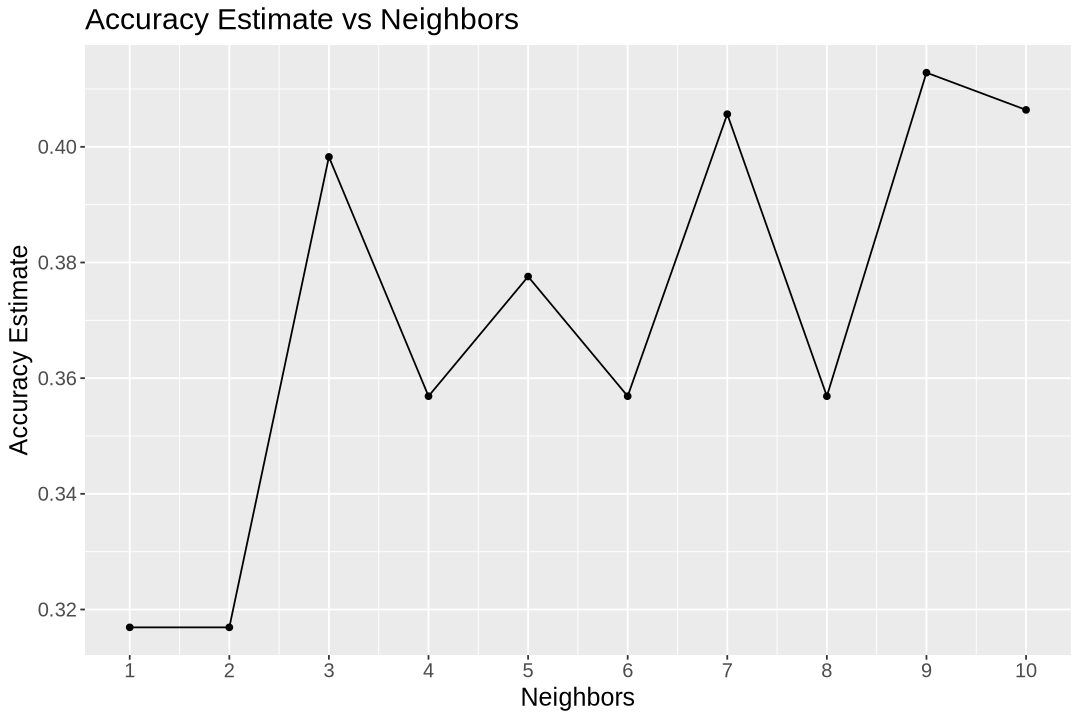

In [15]:
#Set plot width to 9 and height to 6 for more clarity. 
options(repr.plot.width = 9, repr.plot.height = 6)

#Plot Accuracy Estimate vs Number of Neighbors
accuracy_plot <- accuracies |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate", title = "Accuracy Estimate vs Neighbors") +
    scale_x_continuous(breaks = seq(1, 10, by = 1)) +
    theme(text = element_text(size = 15))
accuracy_plot

_Figure 2: Plot of Accuracy Estimate vs Neighbors._

From the graph, we can see that k = 9 has the highest accuracy estiimate, making it the best number of neighbors for our k-NN classification model. 

#### Training the k-NN model with k = 9

Since we have identified k = 9 as the number of neighbors that has the highest accuracy estimate, we can now set `neighbors = 9` in the k-NN model and train it using the training set. 

In [16]:
#Create a k-NN model setting neighbors = 9
best_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 9) |>
    set_engine("kknn") |>
    set_mode("classification")

#### Creating the Workflow with k = 9

We repeat the step of creating a workflow with the same recipe, `players_recipe`, but this time we will use our updated model, `best_knn_spec`, with `neighbors = 9`. We will then fit the model using the training dataset to build it. 

In [17]:
#Repeat the workflow step
#Use best_knn_spec as the model
#Fit the model using the training dataset
best_knn_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(best_knn_spec) |>
    fit(data = players_train)
best_knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(9,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.5172414
Best kernel: rectangular
Best k: 9

#### Predicting on the Testing Dataset

With our k-NN model ready, we will now test it on the testing dataset to evaluate its performance on how well age can predict newsletter subscriptions. 

We will use the `predict()` function to generate predictions on the `players_test` dataset and the `bind_cols()` function to add a predictions column to the test dataset. 

In [21]:
#Predict on the testing dataset
knn_predictions <- predict(best_knn_fit, players_test) |>
    bind_cols(players_test)

#### Evaluating the Model's Accuracy

To evaluate the k-NN model's performance with k = 9, we calculated the accuracy on the testing dataset by comparing the model's prediction (`.pred_class`), to the player's actual subscription status. We used the `metrics()` function, setting `subscribe` as the truth and `.pred_class` as the estimate. 

To focus solely on the accuracy estimate, so that we can see how well the model predicts newsletter subscription based on age, we will filter the results to include only the `accuracy` row in the data table. 

In [22]:
#Calculate the accuracy on the testing dataset
#Filter to include only the accuracy row
knn_metrics <- knn_predictions |>
    metrics(truth = subscribe, estimate = .pred_class)|>
    filter(.metric == "accuracy")
knn_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.5510204


_Table 1.6: Accuracy of the k-NN model when k = 9 is used on the testing dataset._

This accuracy value of 55.10% indicates the amount of correct predictions made by the model. 

#### Confusion Matrix For the Model

To further evaluate the model's accuracy and clearly see how many predictions were made correctly and incorrectly, we can create a confusion matric using the `conf_mat()` function. 

In [23]:
#Create the confusion matrix
knn_conf_mat <- knn_predictions |>
    conf_mat(truth = subscribe, estimate = .pred_class)
knn_conf_mat

          Truth
Prediction FALSE TRUE
     FALSE     5   14
     TRUE      8   22

_Table 7: Confusion matrix of predicted vs. actual newsletter subscriptions._

The confusion matrix allows us to see where the model made errors. From table 7, we can see that out of a total of 49 predictions, the model correctly predicted 5 players who did not subscribe (`FALSE`), and 22 players who did subscribe (`TRUE`).

So, the model made a total of 27 correct predictions, resulting in an accuracy of 55.10%

### Discussion

From our results, we can conclude that, due to the model's low accuracy estimate of 55.10%, it is not very effective at predicting who will subscribe to newsletters based on age in the players.csv dataset.

This conclusion was unexpected to me, because I had expected an accuracy estimate of atleast 75%, since I believed that age would be an important factor in influencing whether players subscribe to newsletters.

An accuracy estimate of 55.10% suggests that a player's age alone does not determine whether they will subscribe to newsletters. This information can be useful, especially for game developers wanting to attract new players, because it provides insight on considering other factors, beyond age, to effectively gain attention. 

This finding leads us to the question that if age is not a good predictor of newsletter subscription, then which player characteristics might be better at predicting whether players will subscribe to Minecraft newsletters?